In [6]:
from dataloader import DataLoaderSegmentation
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline

In [2]:
image_datasets = {x: DataLoaderSegmentation(os.path.join("../interview", x), x) for x in ['train', 'val']}
x,y = image_datasets['train'][0]

../interview/train/images/567_HC.png


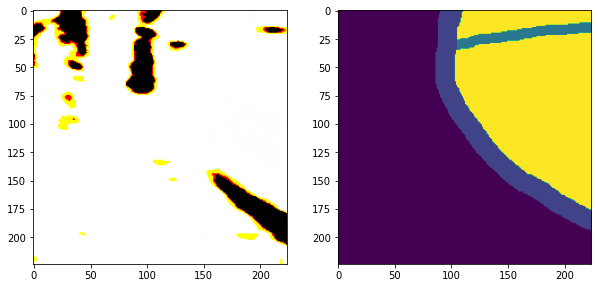

In [9]:
input = x.to("cpu")
image_np = input.squeeze(0).cpu().numpy().astype(np.uint8)
im = image_np.transpose(1,2,0)
img = Image.fromarray(im, 'RGB')

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(img)

f.add_subplot(1,2,2)
input = y.to("cpu")
image_np = input.squeeze(0).cpu().numpy().astype(np.uint8)
plt.imshow(image_np)

plt.show(block=True)

In [13]:
import custom_model
import torch
# Number of classes in the dataset
num_classes = 6

model, input_size = custom_model.initialize_model(num_classes, keep_feature_extract=True, use_pretrained=False)

state_dict = torch.load("training_output/best_DeepLabV3.pth", map_location="cpu")

model.load_state_dict(state_dict)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [17]:
from torchvision import transforms
transforms_image =  transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

os.makedirs("./results", exist_ok=True)

for filename in os.listdir("../interview/test/images"):
    image = Image.open(f"../interview/test/images/{filename}").convert("RGB")

    image_np = np.asarray(image)
    # image_np = cv2.resize(image_np, 0.5, 0.5, cv2.INTER_CUBIC)
    width = int(image_np.shape[1] * 1)
    height = int(image_np.shape[0] * 1)
    dim = (width, height)
    image_np = cv2.resize(image_np, dim, interpolation=cv2.INTER_AREA)

    image = Image.fromarray(image_np)
    image = transforms_image(image)
    image = image.unsqueeze(0)

    outputs = model(image)["out"]

    _, preds = torch.max(outputs, 1)

    preds = preds.to("cpu")

    preds_np = preds.squeeze(0).cpu().numpy().astype(np.uint8)

    print(preds_np.shape)
    print(image_np.shape)
    # preds_np = cv2.cvtColor(preds_np, cv2.COLOR_GRAY2BGR)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    preds_np_color = cv2.applyColorMap(preds_np * 50, cv2.COLORMAP_HSV)

    cv2.imwrite(f"./results/{filename[:-4]}_color.png", preds_np_color)
    cv2.imwrite(f"./results/{filename[:-4]}_Annotation.png", preds_np)


(540, 800)
(540, 800, 3)
(540, 800)
(540, 800, 3)
(540, 800)
(540, 800, 3)
(540, 800)
(540, 800, 3)
(540, 800)
(540, 800, 3)


KeyboardInterrupt: 